# Track oil droplet experiments from 20231124

In [1]:
import os
import glob
import numpy as np
import traceback
import dclab
import dctrack

# supress warning from skimage
import warnings
warnings.filterwarnings(
    "ignore", message="divide by zero encountered in scalar divide")
warnings.filterwarnings(
    "ignore", message="invalid value encountered in scalar divide")
warnings.filterwarnings(
    "ignore", message="Polyfit may be poorly conditioned")

C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\track.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
project_folder = r"..\..\raw_data\20231124_Felix_Si-oil_droplets"
export_folder = r"..\..\tracked_data"

In [4]:
# length of hyperbolic region in um
length_hyper_region = 500
frame_max = None
timeout = None  # 1h 30m

for root, _, _ in os.walk(project_folder):
    if not "tracked_files" in root:
        rtdc_paths = glob.glob(os.path.join(root,"*.rtdc"))
        for file in rtdc_paths:
            print("Analyzing {} \n".format(file))
            # create directory with same structure as Data/RTDC to export data
            file_split = file.split("\\")
            rtdc_idx = file_split.index("RTDC")
            subfolders_export = np.array(file_split)[rtdc_idx+1:-1]
            save_folder = os.path.join(export_folder,"\\".join(subfolders_export))
            if not os.path.isdir(save_folder):
                os.makedirs(save_folder)
            video_folder = os.path.join(save_folder,"Videos")
            if not os.path.isdir(video_folder):
                os.makedirs(video_folder)

            save_path = os.path.join(save_folder, file_split[-1])
            if not os.path.isfile(save_path):
                try:
                    ds = dclab.new_dataset(file)
                    tr_ds = dctrack.track.TrackedDataSet(ds)

                    pix_size = tr_ds.pixel_size
                    tr_ds.tolerance_window = 30

                    tr_ds.channel = True
                    tr_ds.outlet = False
                    if "inlet" in file:
                        tr_ds.inlet = False
                        channel_entry = tr_ds.channel_x_min - 500/pix_size
                        tr_ds.set_channel_values_manual(x_min=0,
                                                        x_max=tr_ds.roi_size_x)
                    else:
                        tr_ds.inlet = True
                        # ROI start 50 um before channel start
                        channel_entry = tr_ds.channel_x_min + 50/pix_size
                        tr_ds.set_channel_values_manual(x_min=0,
                                                        x_max=channel_entry)
                    # start of hyperbolic region in um
                    hyper_start = channel_entry*pix_size + length_hyper_region

                    tr_ds.track(frame_min=0, frame_max=frame_max,
                                timeout=timeout,
                                max_skip_frames=8)
                    tr_ds.time_after_x(hyper_start, return_value=False,
                                       add_to_dataset=True,
                                       variable_name='time_hyper_region')
                    tr_ds.get_ellipse_data(show_progress=False)

                    frame_tracked = tr_ds.dataset['frame'][:][~np.isnan(tr_ds.dataset['object_number'][:])]
                    tr_ds.filter_feature('frame', 0, frame_tracked[-1])

                    export_features = tr_ds.dataset.features_scalar
                    if 'inert_ratio_raw' not in export_features:
                        export_features += ['inert_ratio_raw', 'inert_ratio_cvx', 'inert_ratio_prnc']
                    tr_ds.export_tracked_dataset_as_hdf5(path=save_path,
                                                         features=export_features,
                                                         filtered=True,
                                                         override=True,
                                                         compression=None,
                                                         skip_checks=True)

                    video_path = os.path.join(video_folder, os.path.splitext(file_split[-1])[0]+".avi")
                    tr_ds.write_video(save_path=video_path, first_frame=1000, last_frame=3000,
                                      draw_zones=True)
                except:
                    print("An error occured. See below \n")
                    print(traceback.print_exc())

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\1000cSt\hyper\M001_data.rtdc 


Tracking in progress:   0%|          | 0/47270 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/769 [00:00<?, ?it/s]

C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\video.py:118: RuntimeWarning: invalid value encountered in cast
  zone_starts = np.array(dataset['prediction_zone_start']
C:\Users\freiche\ownCloud\PhD\Code_general\rtdc_tracking2.0\dctrack\video.py:120: RuntimeWarning: invalid value encountered in cast
  zone_ends = np.array(dataset['prediction_zone_end']


Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\1000cSt\hyper\M002_data.rtdc 


Tracking in progress:   0%|          | 0/47636 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/728 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\1000cSt\hyper\M003_data.rtdc 


Tracking in progress:   0%|          | 0/11901 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/262 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\1000cSt\inlet\M001_data.rtdc 


Tracking in progress:   0%|          | 0/2515 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/206 [00:00<?, ?it/s]

C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\dclab\rtdc_dataset\writer.py:569: RuntimeWarning: All-NaN axis encountered
  val = ufunc(dset)
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\dclab\rtdc_dataset\writer.py:579: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(dset)


Writing video:   0%|          | 0/1515 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\500cSt\hyper\M001_data.rtdc 


Tracking in progress:   0%|          | 0/14858 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/221 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\500cSt\hyper\M002_data.rtdc 


Tracking in progress:   0%|          | 0/6272 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/90 [00:00<?, ?it/s]

Writing video:   0%|          | 0/2000 [00:00<?, ?it/s]

Analyzing Y:\Data\RTDC\20231124_Felix_Si-oil_droplets\500cSt\inlet\M001_data.rtdc 


Tracking in progress:   0%|          | 0/1027 [00:00<?, ?it/s]

Computing velocities:   0%|          | 0/73 [00:00<?, ?it/s]

Writing video:   0%|          | 0/27 [00:00<?, ?it/s]

## Summarize results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
from tqdm.notebook import tqdm
from scripts.extensional_paras import (fit_velocity,
                                       extension_rate_from_velocity_poly,
                                       recalculate_time)

In [6]:
# for some reason need to re-register the ellipse features
ell_features = ['ell_cx', 'ell_cy', 'ell_major', 'ell_minor', 'ell_angle']
for ell_feat in ell_features:
    if not dclab.definitions.feature_exists(ell_feat):
        dclab.register_temporary_feature(feature=ell_feat)

In [7]:
def compute_extensional_paras(tr_ds,
                              hyper_start=None, hyper_end=None,
                              stable_region_start=None,
                              filter=False, **filter_kws):
    """
    :param tr_ds: tracked_dataset instance of dctrack
    :return: df: dataframe with additional analysis parameters
    """
    if filter:
        tr_ds.filter_obj_distance = True
        tr_ds.filter_obj_n_events = True
        tr_ds.filter_backward_movement = True
        tr_ds.filter(inplace=True, return_filtered_ds=False, **filter_kws)

    df = tr_ds.get_extensional_paras_dataframe(hyper_start=hyper_start,
                                               hyper_end=hyper_end,
                                               stable_extension_start=stable_region_start
                                               )
    return df

def get_folder_data(folder):
    # print("Analyzing ", folder)
    files = glob.glob(os.path.join(folder, "*.rtdc"))

    df_folder = pd.DataFrame()

    for file in tqdm(files):
        tr_ds = dctrack.track.TrackedDataSet(file)
        flow_rate = np.round(tr_ds.dataset.config['setup']['flow rate'], 2)
        # hyperbola start 500 um before channel
        hyper_start = tr_ds.channel_x_max * tr_ds.pixel_size + 500
        # stable region 150 µm in the hyperbola
        # (flow right to left -> negative sign)
        stable_region_start = hyper_start - 150

        df = compute_extensional_paras(tr_ds,
                                       hyper_start=hyper_start,
                                       stable_region_start=stable_region_start,
                                       filter=True,
                                       max_back_movement=0,
                                       min_events=5)

        # only use data in linear regime for fitting
        df_filtered = df[(150 < df['x_hyper']) & (df['x_hyper'] < 450)]
        x_fit = np.array(df_filtered['x_hyper']) *1e-6 #  in m
        y_fit = np.array(df_filtered['velocity'])
        idx = np.isfinite(x_fit) & np.isfinite(y_fit)
        p, cov = np.polyfit(x_fit[idx], y_fit[idx], 1, cov=True)
        fit_errs = np.sqrt(np.diag(cov))

        df['extension_rate_sample'] = abs(p[0])
        df['extension_rate_sample_err'] = fit_errs[0]
        df['flow_rate'] = flow_rate

        roi_size_x = tr_ds.dataset.config['imaging']['roi size x']
        pix_size = tr_ds.dataset.config['imaging']['pixel size']
        df['pos_x_center'] = df['pos_x'] - roi_size_x * pix_size / 2
        
        df['run_idx'] = tr_ds.dataset.config['experiment']['run index']
        df['diameter'] = 2 * np.sqrt(pix_size**2 * df['ell_major'] * df['ell_minor'])
        
        df_folder = pd.concat([df_folder, df])

    return df_folder

def df_fit_values(df_in, x_feature='x_shift', time_label='time_shift', poly_degree=12, x_0=-60,
                  pixel_size=0.68, viscosity=0.1):
    df_out = pd.DataFrame()
    flow_rates = df_in['flow_rate'].unique()
    run_idxx = df_in['run_idx'].unique()
    pbar = tqdm(flow_rates, desc="Iterating over flow_rates")
    for fr in pbar:
        for ridx in run_idxx:
            df = df_in.loc[(df_in['flow_rate'] == fr) & 
                           (df_in['run_idx'] == ridx)]
            if len(df) > 0:
                df['x_shift'] = df['x_hyper'] - x_0
                x = df[x_feature]
                velocity_poly = fit_velocity(df, x_feature=x_feature, degree=poly_degree)
                df['velocity_fit'] = velocity_poly(x)
                er = extension_rate_from_velocity_poly(x, velocity_poly)
                df['extension_rate_fit'] = er
                df = recalculate_time(df, velocity_poly,
                                      x_feature=x_feature,
                                      time_label=time_label)
                # repeat time calculation for x_hyper -> time_hyper
                velocity_poly = fit_velocity(df, x_feature='x_hyper', degree=poly_degree)
                df = recalculate_time(df, velocity_poly,
                                      x_feature='x_hyper',
                                      time_label='time_hyper')
                df_out = pd.concat([df_out, df])

    df_out['normal_stress']  = 4 * viscosity * df_out['extension_rate_fit']

    return df_out

def get_df_strain_features(df_in):
    df_in['strain_inert'] = df_in['inert_ratio_raw'] - 1
    # net tensile strain based on inertia ratio assuming shape is an ellipse
    df_in['net_strain_inert'] = ((df_in['inert_ratio_raw'] - 1) 
                                 / np.sqrt(df_in['inert_ratio_raw']))
    # strain features based on principal inertia ratio
    df_in['strain_inert_prnc'] = df_in['inert_ratio_prnc'] - 1
    # net tensile strain based on inertia ratio assuming shape is an ellipse
    df_in['net_strain_inert_prnc'] = ((df_in['inert_ratio_prnc'] - 1) 
                                      / np.sqrt(df_in['inert_ratio_prnc']))
    # ellipse features
    df_in['net_strain_ell'] = ((df_in['ell_major'] - df_in['ell_minor']) 
                               / np.sqrt(df_in['ell_major'] * df_in['ell_minor']))
    df_in['taylor_strain_ell'] = ((df_in['ell_major'] - df_in['ell_minor']) 
                                  / (df_in['ell_major'] + df_in['ell_minor']))
    return df_in

In [8]:
project_folder = r"T:\Members\Felix\analysis_data\RTDC\20231124_Felix_Si-oil_droplets"
# only use data from third try
folder_names = [ff for ff in os.listdir(project_folder) 
                if os.path.isdir(os.path.join(project_folder, ff))]

In [9]:
data_exports = r"..\data_exports"

In [10]:
data_folder = os.path.join(data_exports, "20231124_Si-oil_droplets", "exports_20231124")
if not os.path.isdir(data_folder):
    os.makedirs(data_folder)

##### Create and save one dataframe for all hyper data from 20231124
Need to create individual files for each sample because loop breaks often.

In [11]:
x0 = -60

In [12]:
for folder in tqdm(folder_names):
    print("Analyzing: ", folder)
    save_path = os.path.join(data_folder, folder + "_hyper.tsv")

    # if not os.path.isfile(save_path):
    data_dir = os.path.join(project_folder, folder, "hyper")
    df_cc = get_folder_data(data_dir)

    df_cc = df_fit_values(df_cc.loc[df_cc['x_hyper'] < 530], x_0=x0)
    df_cc['sample'] = folder

    df_cc.to_csv(save_path, sep='\t')

  0%|          | 0/2 [00:00<?, ?it/s]

Analyzing:  1000cSt


  0%|          | 0/3 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\freiche\AppData\Local\Temp\ipykernel_24608\2433660625.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_shift'] = df['x_hyper'] - x_0
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\AppData\Local\Temp\ipykernel_24608\2433660625.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocity_fit'] = velocity_poly(x)
C:\Us

Analyzing:  500cSt


  0%|          | 0/2 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\freiche\AppData\Local\Temp\ipykernel_24608\2433660625.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_shift'] = df['x_hyper'] - x_0
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\AppData\Local\Temp\ipykernel_24608\2433660625.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocity_fit'] = velocity_poly(x)
C:\Us

In [13]:
df_20231124 = pd.DataFrame()
files_20231124 = glob.glob(os.path.join(data_folder, "*hyper.tsv"))
for file in tqdm(files_20231124):
    df_cc = pd.read_csv(os.path.join(data_folder, file), sep='\t', index_col=0)
    df_20231124 = pd.concat([df_20231124, df_cc], ignore_index=True)

  0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
df_20231124['date'] = '20231124'
df_20231124['wc'] = 60
df_20231124 = get_df_strain_features(df_20231124)

In [15]:
filename = "20231124_oil_droplets_hyper.tsv"
df_20231124.to_csv(os.path.join(data_exports, "20231124_Si-oil_droplets", filename),
                   sep='\t')
print("Done")

Done


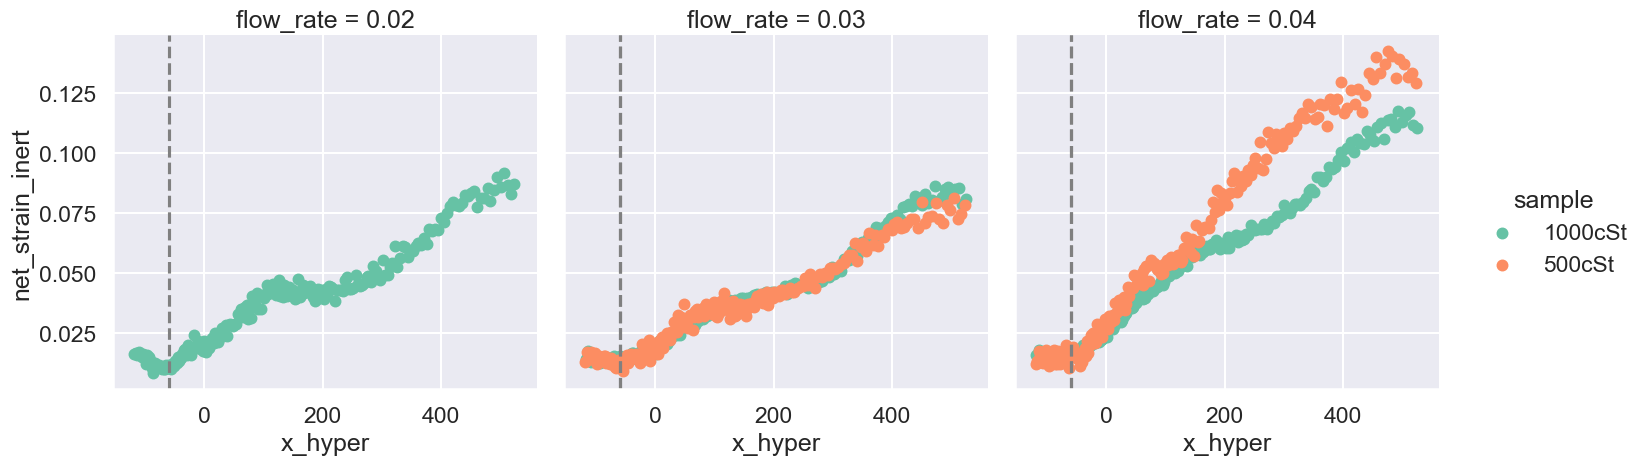

In [16]:
g = sns.lmplot(data=df_20231124,
               x='x_hyper', y='net_strain_inert', hue='sample', palette='Set2',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True, 
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

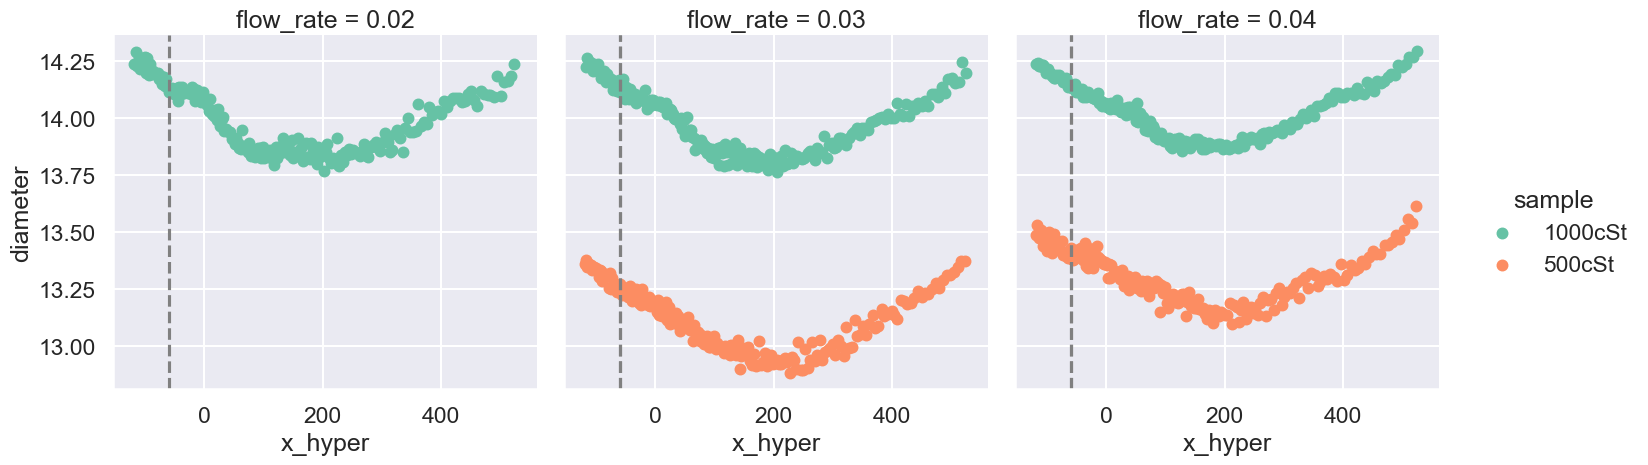

In [17]:
g = sns.lmplot(data=df_20231124,
               x='x_hyper', y='diameter', hue='sample', palette='Set2',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

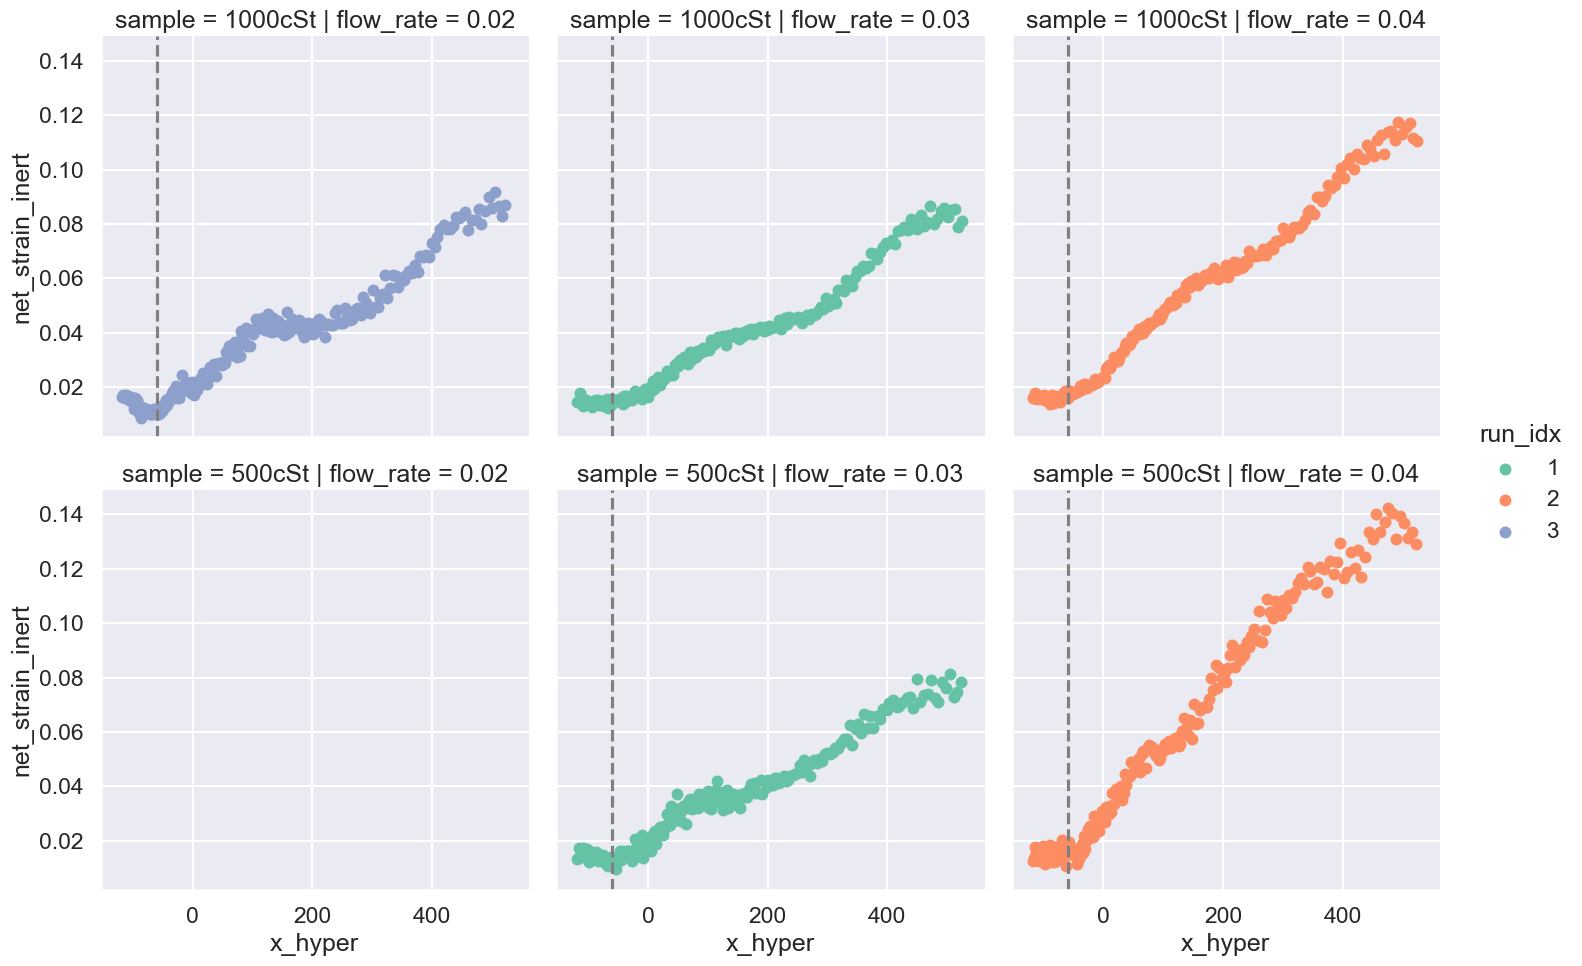

In [18]:
g = sns.lmplot(data=df_20231124,
               x='x_hyper', y='net_strain_inert', hue='run_idx', palette='Set2',
               row='sample',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

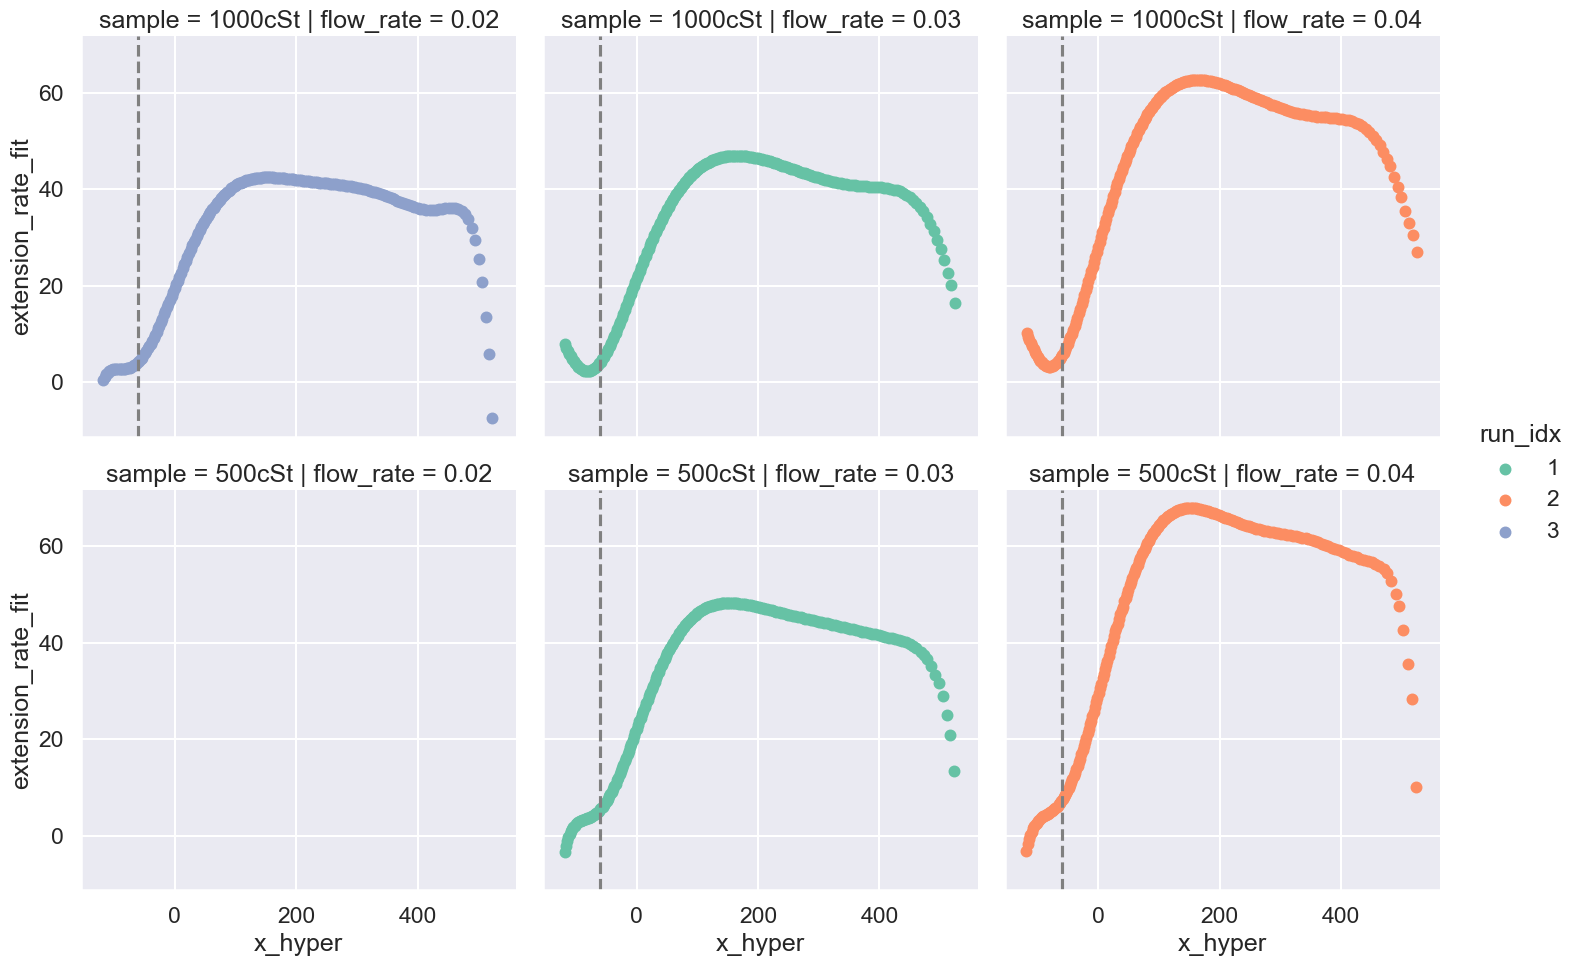

In [19]:
g = sns.lmplot(data=df_20231124,
               x='x_hyper', y='extension_rate_fit', hue='run_idx', palette='Set2',
               row='sample',
               col='flow_rate',  #col_wrap=5,
               x_bins=200, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True,
                          # 'legend_out': False
                          }
               )
g.refline(x=x0, markersize=0)
plt.show()

In [20]:
df_20231124

area_msd  area_ratio    area_um    aspect  bright_avg  bright_sd  \
0          324.5    1.024653  153.74800  1.000000  119.591550  15.201350   
1          327.0    1.024465  154.90400  1.047619  119.330536  14.836079   
2          323.0    1.020124  152.36081  1.000000  119.526910  15.638987   
3          323.5    1.024730  153.28560  1.000000  119.788140  15.970763   
4          323.0    1.030960  153.97920  1.047619  120.249290  15.800282   
...          ...         ...        ...       ...         ...        ...   
131741     303.5    1.023064  143.57521  1.157895  115.474470  12.756089   
131742     304.5    1.036125  145.88720  1.100000  114.751495  12.611227   
131743     306.0    1.029412  145.65600  1.100000  114.053734  12.525679   
131744     310.0    1.032258  147.96800  1.100000  113.032360  12.151089   
131745     313.0    1.030351  149.12401  1.100000  112.291540  11.916234   

            circ    deform  ell_angle      ell_cx  ...  normal_stress  \
0       0.989532  0.010468   0.527069  763.825552  ...      12.316279   
1       0.992028  0.007972   0.131637  757.408527  ...      12.792850   
2       0.989880  0.010120   0.493151  750.868950  ...      13.262174   
3       0.990065  0.009935   0.324325  744.160415  ...      13.725517   
4       0.992660  0.007340   0.095235  737.370658  ...      14.166277   
...          ...       ...        ...         ...  ...            ...   
131741  0.986669  0.013331   0.185996  143.563423  ...      22.666784   
131742  0.989325  0.010675   0.254905  116.225215  ...      22.057163   
131743  0.988643  0.011357   0.250545   88.226138  ...      20.095064   
131744  0.989276  0.010724   0.262575   59.451746  ...      14.201856   
131745  0.989933  0.010067   0.272578   30.398092  ...      -0.887584   

         sample      date  wc  strain_inert  net_strain_inert  \
0       1000cSt  20231124  60      0.009737          0.009690   
1       1000cSt  20231124  60      0.017995          0.017835   
2       1000cSt  20231124  60      0.005459          0.005444   
3       1000cSt  20231124  60      0.018816          0.018642   
4       1000cSt  20231124  60      0.028418          0.028022   
...         ...       ...  ..           ...               ...   
131741   500cSt  20231124  60      0.146620          0.136925   
131742   500cSt  20231124  60      0.139712          0.130869   
131743   500cSt  20231124  60      0.127795          0.120337   
131744   500cSt  20231124  60      0.137743          0.129136   
131745   500cSt  20231124  60      0.125773          0.118540   

        strain_inert_prnc  net_strain_inert_prnc  net_strain_ell  \
0                0.017929               0.017770        0.019213   
1                0.018653               0.018482        0.019558   
2                0.008917               0.008878        0.009331   
3                0.022788               0.022533        0.022511   
4                0.029407               0.028984        0.029404   
...                   ...                    ...             ...   
131741           0.159201               0.147865        0.147732   
131742           0.160872               0.149309        0.149052   
131743           0.146810               0.137091        0.135899   
131744           0.160765               0.149217        0.147696   
131745           0.148627               0.138678        0.136979   

        taylor_strain_ell  
0                0.009606  
1                0.009778  
2                0.004666  
3                0.011255  
4                0.014701  
...                   ...  
131741           0.073665  
131742           0.074320  
131743           0.067793  
131744           0.073647  
131745           0.068329  

[131746 rows x 66 columns]

### Summarize inlet data

In [21]:
def get_folder_data_inlet(folder):
    # print("Analyzing ", folder)
    files = glob.glob(os.path.join(folder, "*.rtdc"))

    df_folder = pd.DataFrame()

    for file in tqdm(files):
        tr_ds = dctrack.track.TrackedDataSet(file)
        flow_rate = np.round(tr_ds.dataset.config['setup']['flow rate'], 3)
        # hyperbola start 500 um before channel
        hyper_start = tr_ds.channel_x_min * tr_ds.pixel_size - 500

        df = compute_extensional_paras(tr_ds,
                                       hyper_start=hyper_start,
                                       filter=True,
                                       max_back_movement=0,
                                       min_events=5)
        df['flow_rate'] = flow_rate
        roi_size_x = tr_ds.dataset.config['imaging']['roi size x']
        pix_size = tr_ds.dataset.config['imaging']['pixel size']
        df['pos_x_center'] = df['pos_x'] - roi_size_x * pix_size / 2
        
        # print(tr_ds.dataset.config['experiment']['run index'])
        df['run_idx'] = tr_ds.dataset.config['experiment']['run index']
        
        df_folder = pd.concat([df_folder, df])

    return df_folder

In [22]:
for folder in tqdm(folder_names):
    save_path = os.path.join(data_folder, folder + "_inlet.tsv")
    
    # if not os.path.isfile(save_path):
    data_dir = os.path.join(project_folder, folder, "inlet")
    df_cc = get_folder_data_inlet(data_dir)
    df_cc = df_fit_values(df_cc, x_0=x0)
    df_cc['sample'] = folder
    df_cc.to_csv(save_path, sep='\t')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


  0%|          | 0/1 [00:00<?, ?it/s]

Iterating over flow_rates:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\freiche\Anaconda3\envs\py311_rtdc\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [23]:
df_20231124_inlet = pd.DataFrame()
files_20231124_inlet = glob.glob(os.path.join(data_folder, "*inlet.tsv"))
for file in tqdm(files_20231124_inlet):
    df_cc = pd.read_csv(os.path.join(data_folder, file), sep='\t', index_col=0)
    df_20231124_inlet = pd.concat([df_20231124_inlet, df_cc], ignore_index=True)

  0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
df_20231124_inlet['date'] = '20231124'
df_20231124_inlet['wc'] = 60
df_20231124_inlet = get_df_strain_features(df_20231124_inlet)

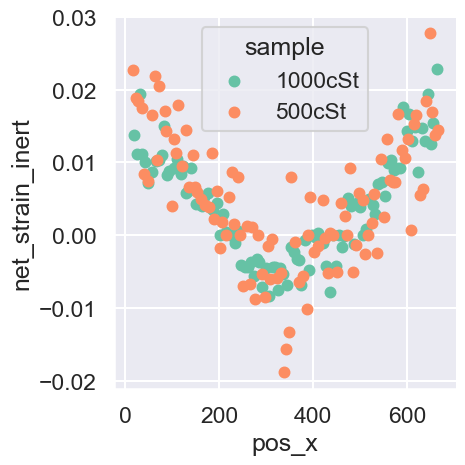

In [25]:
g = sns.lmplot(data=df_20231124_inlet,
               x='pos_x', y='net_strain_inert',
               hue='sample', palette='Set2',
               x_bins=100, x_estimator=np.median, fit_reg=False, ci=None,
               facet_kws={'sharey': True, 'legend_out': False})
# g.refline(x=x0, markersize=0)
plt.show()

In [26]:
filename = "20231124_oil_droplets_inlet.tsv"
df_20231124_inlet.to_csv(os.path.join(data_exports, "20231124_Si-oil_droplets", filename),
                         sep='\t')
print("Done")

Done
